In [1]:
%config IPCompleter.greedy=True

# Correlacion
Veremos si existe una correlacion entre el gasto y los medios

In [2]:
import pandas as pd

In [31]:
data_ads = pd.read_csv(r"C:\Users\Rudy\Documents\GitHub\python-ml-course\datasets\ads\Advertising.csv")

In [19]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
len(data_ads)

200

In [7]:
import numpy as np

In [8]:
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))
#Aqui añadimos una columna para la correlacion, a traves de la correlacion de pearsons
#Recordemos que es medir como nos alejamos de los extremos
#data_ads["corrn"] es solo el numerador de la formula de pearsons

In [9]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [10]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2
#Esta parte, es solo cada una de las x - x promedio todo al cuadrado

In [11]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [12]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2
#Esta parte, es solo cada una de las y - y promedio todo al cuadrado

In [13]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [14]:
corr_pearsons = sum(data_ads["corrn"]) / np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))
#Aqui ya es la formula de pearsons completa, la sumatoria arriba con todas las x - su promedio multiplicado
#por todas las y - su promedio
#Y abajo la raiz cuadrada de la multiplicacion de las 2 sumatorias 

In [15]:
corr_pearsons

0.782224424861606

Obtuvimos un reasultado positivo, lo cual quiere decir que efectivamente tienen una correlacion

In [16]:
#Crearemos lo que acabamos de hacer en una funcion
def corr_coeff(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"]) / np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_p

In [17]:
#La testeamos esperando obtener el mismo resultado
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

In [20]:
cols = data_ads.columns.values
cols

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

In [21]:
#Con estos bucles sacaremos el coeficiente de correlacion de todas las columnas con todas las columnas
for x in cols:
    for y in cols:
        print(x + ", " + y + " : " + str(corr_coeff(data_ads, x, y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583006
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
Radio, TV : 0.05480866446583006
Radio, Radio : 1.0
Radio, Newspaper : 0.35410375076117545
Radio, Sales : 0.576222574571055
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.35410375076117545
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616534
Sales, TV : 0.782224424861606
Sales, Radio : 0.576222574571055
Sales, Newspaper : 0.22829902637616534
Sales, Sales : 1.0


In [22]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Ventas')

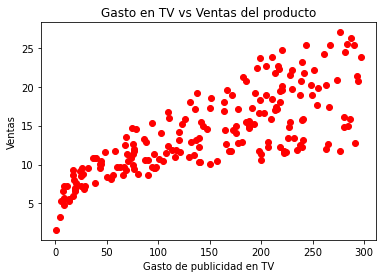

In [25]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV vs Ventas del producto")
plt.xlabel("Gasto de publicidad en TV")
plt.ylabel("Ventas")
#Podemos ver que en el grafico si presentan una relacion logica

Text(0, 0.5, 'Ventas')

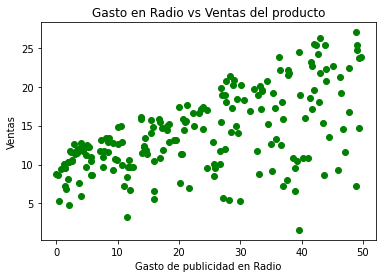

In [28]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto en Radio vs Ventas del producto")
plt.xlabel("Gasto de publicidad en Radio")
plt.ylabel("Ventas")
#Aqui se puede observar una dispersion algo notoria

Text(0, 0.5, 'Ventas')

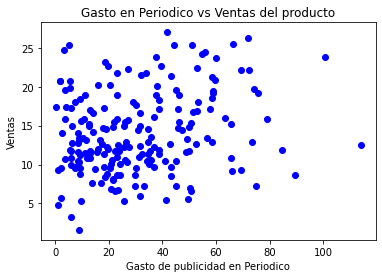

In [29]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en Periodico vs Ventas del producto")
plt.xlabel("Gasto de publicidad en Periodico")
plt.ylabel("Ventas")
#Aqui se ve una dispersion total

In [32]:
#Podemos tambien obtener una tabla de correlaciones con una funcion que ya incluye pandas, la funcion corr()
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


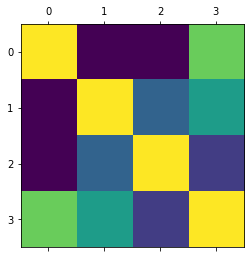

In [34]:
plt.matshow(data_ads.corr())
#Los amarillos son correlaciones completas, es decir de 1
#Los verdes una correlacion alta
#Los morados casi nula